AI PROJECT
Churning Analysis and Prediction 
Sukriti Dubey - 18BCE0927
Bhand Manan Sudhakar - 18BCE0915
Nidhi Mankala - 18BCE2340

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


In [2]:
dataset = pd.read_csv('C:/Users/user/Downloads/churn_data.csv')
data_test=pd.read_csv('C:/xampp/htdocs/phpfile/churn_test.csv')

In [3]:
dataset.head(5)


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()


user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
#Getting dataset where column age is not null
dataset = dataset[pd.notnull(dataset['age'])]
data_test = dataset[pd.notnull(dataset['age'])]

In [9]:
#checking if age is in proper range
flag=0
for v in dataset['age']:
    if(v<18 and v>80):
        flag=1
        print(v)
if flag==0:
    print('In range')


In range


In [10]:
#Dropping columns credit_scored and rewards_earned as they have huge no of nan
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])
data_test = data_test.drop(columns = ['credit_score', 'rewards_earned'])

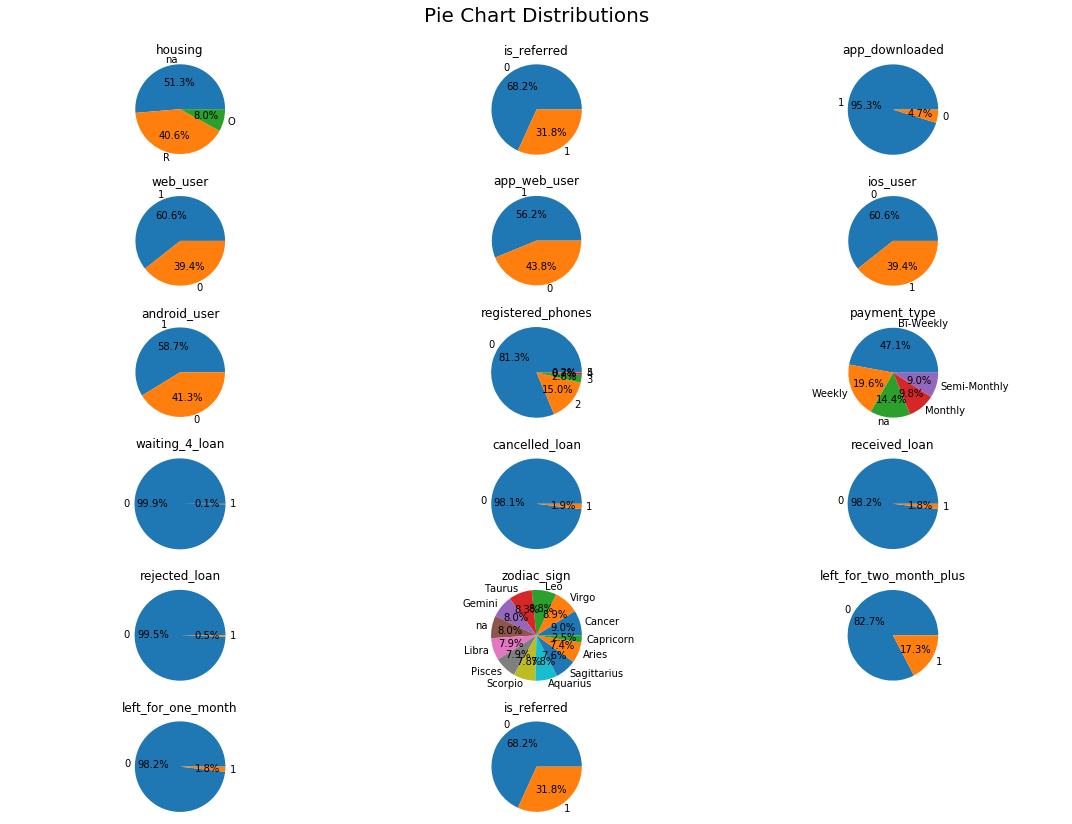

In [11]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
 'web_user', 'app_web_user', 'ios_user',
 'android_user', 'registered_phones', 'payment_type',
 'waiting_4_loan', 'cancelled_loan',
'received_loan', 'rejected_loan', 'zodiac_sign',
 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
 plt.subplot(6, 3, i)
 f = plt.gca()
 f.axes.get_yaxis().set_visible(False)
 f.set_title(dataset2.columns.values[i - 1])

 values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
 index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
 plt.pie(values, labels = index, autopct='%1.1f%%')
 plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [12]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [13]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()


1    274
0    234
Name: churn, dtype: int64

In [14]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [15]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [16]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()


1    266
0    222
Name: churn, dtype: int64

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,ios_user,android_user,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0.00,0
1,23547,0,28.0,0,0,1,0,0,96,0,...,1,0,0,0,0,0,0,0,1.47,1
2,58313,0,35.0,47,2,86,47,0,285,0,...,0,1,0,0,0,0,1,0,2.17,0
3,8095,0,26.0,26,3,38,25,0,74,0,...,0,1,0,0,0,0,0,0,1.10,1
4,61353,1,27.0,0,0,2,0,0,0,0,...,0,1,0,0,0,0,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,0,0,0,0,0,81,0,...,0,1,0,0,0,0,0,0,1.07,1
26996,4116,1,26.0,0,0,2,0,0,1,0,...,0,1,0,0,0,1,1,0,0.67,0
26997,23740,0,22.0,0,0,37,0,0,98,0,...,0,1,0,0,0,0,0,0,0.93,0
26998,47663,1,46.0,2,0,16,2,0,58,0,...,1,0,0,0,0,0,1,0,0.90,1


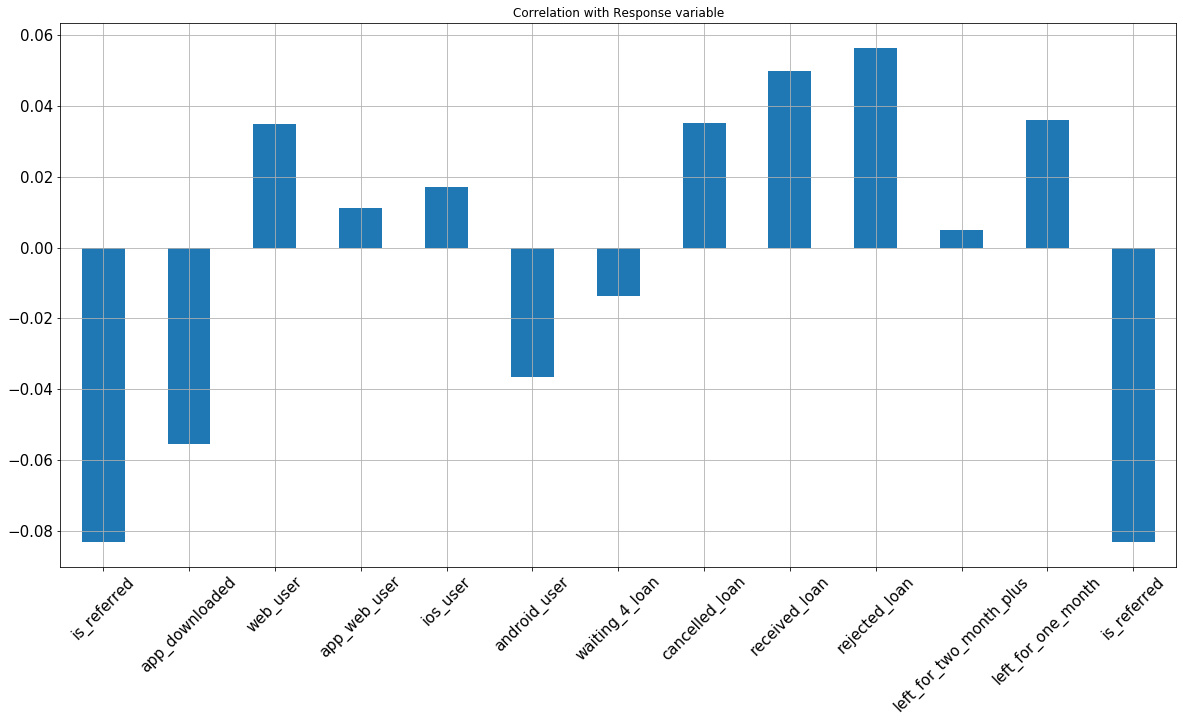

In [17]:
dataset2.drop(columns = ['housing', 'payment_type',
 'registered_phones', 'zodiac_sign']
 ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
 title = 'Correlation with Response variable',
 fontsize = 15, rot = 45,
 grid = True)
data_test.drop(columns = ['housing', 'payment_type',
 'registered_phones', 'zodiac_sign']
 )

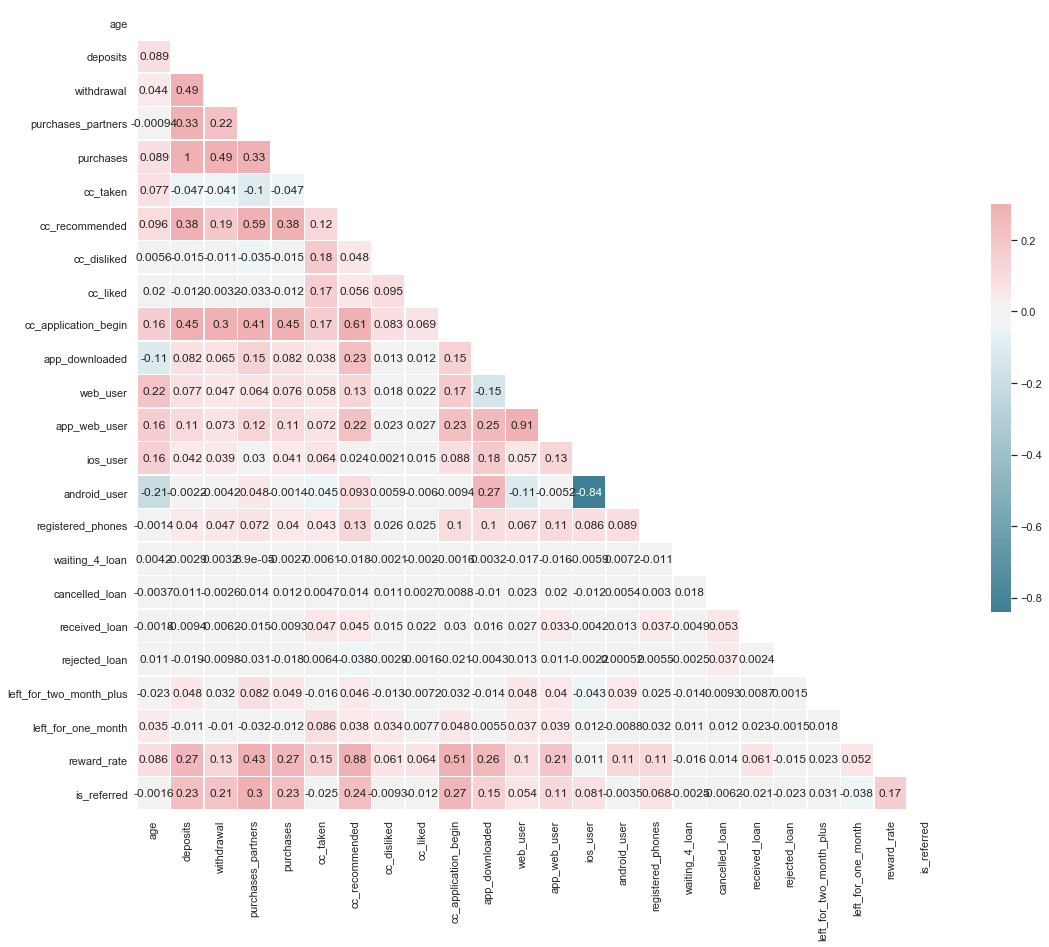

In [18]:
## Correlation Matrix
sn.set(style="white")
# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [19]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])
data_test=data_test.drop(columns = ['app_web_user'])

In [20]:
#save our prepared dataset to new_churn_data
dataset.to_csv('new_churn_data.csv', index = False)


In [21]:
# Dropping attribute user as it is not useful
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])
data_test=data_test.drop(columns = ['user'])

In [22]:
# One-Hot Encoding
#Get dummies data for categorial variable
dataset = pd.get_dummies(dataset)
dataset.columns


Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [23]:
# Dropping categorical data where they are na
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
 test_size = 0.2,
 random_state = 0)

In [25]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [26]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [27]:
if len(pos_index) > len(neg_index):
 higher = pos_index
 lower = neg_index
else:
 higher = neg_index
 lower = pos_index


In [28]:
import random
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [30]:
X_train.head()


,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11572,-0.629054,-0.258361,-0.29094,0.487171,-0.255882,-0.165814,-0.472506,-0.058110,-0.069033,-0.258910,...,-0.310232,6.310642,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
14318,-0.729144,-0.367346,-0.29094,1.307537,-0.367002,-0.165814,1.582293,-0.058110,-0.069033,-0.179132,...,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,3.408003,-0.299619,-0.313539
11697,-0.629054,-0.367346,-0.29094,-0.614464,-0.367002,-0.165814,-0.932870,-0.058110,-0.069033,-0.578023,...,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
16715,-1.029415,-0.367346,-0.29094,-0.216000,-0.367002,-0.165814,-0.955327,-0.058110,-0.069033,-0.578023,...,-0.310232,-0.158462,-0.29547,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
19770,-0.428873,-0.367346,-0.29094,-0.661342,-0.367002,-0.165814,0.279798,1.094277,-0.069033,-0.578023,...,-0.310232,-0.158462,-0.29547,-0.310859,3.385503,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539


In [31]:
X_test.head()


,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2835,-0.028512,0.831483,-0.290940,-0.637903,0.855323,2.072260,1.189299,-0.058110,-0.069033,1.815324,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,3.458726,-0.293427,-0.299619,-0.313539
21022,-0.729144,-0.367346,-0.290940,2.338855,-0.367002,-0.165814,1.649663,-0.058110,-0.069033,-0.418466,...,-0.310232,-0.158462,3.384441,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
5592,1.472841,0.831483,1.587988,-0.661342,0.855323,-0.165814,0.392082,2.246665,-0.069033,2.134437,...,-0.310232,-0.158462,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,3.337575,-0.313539
15773,0.071578,-0.367346,-0.290940,-0.473830,-0.367002,-0.165814,-1.022698,-0.058110,-0.069033,-0.578023,...,-0.310232,6.310642,-0.295470,-0.310859,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539
15123,-1.029415,0.286561,-0.290940,3.018587,0.299721,-0.165814,1.683349,-0.058110,-0.069033,2.054658,...,-0.310232,-0.158462,-0.295470,3.216892,-0.295377,-0.292309,-0.289124,-0.293427,-0.299619,-0.313539


Model building


Fitting model into training set

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
classifier = LogisticRegression(solver='lbfgs')

In [33]:
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [34]:
# summarize the selection of the attributes
print("Attributes which will be include:")
print(rfe.support_)


Attributes which will be include:
[ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True  True  True  True False  True
  True False False False  True False False False False False False False
 False False False False False]


In [35]:
#rfe ranking
print(rfe.ranking_)

[ 1  1  1  1  1  1  1 14 22  3 18  1  1 19  1  1  1  1  1  1  1  1  7  1
  1  4 12  5  1  6 17 15  2  8 20 10 13 21 11  9 16]


In [36]:
print("Columns which will be included:")
X_train.columns[rfe.support_]


Columns which will be included:


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_O', 'housing_R',
       'payment_type_Weekly'],
      dtype='object')

In [37]:
rfe = rfe.fit(X_train, y_train)

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:")
accuracy_score(y_test, y_pred)


Accuracy:


0.645

In [41]:
print("Precision Score: ", precision_score(y_test, y_pred)) # tp / (tp + fp)


Precision Score:  0.584804708400214


In [42]:
print("Recall Score: ",recall_score(y_test, y_pred)) # tp / (tp + fn)

Recall Score:  0.4892569382273948


In [43]:
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.5327808920302218


Confusion Matrix:


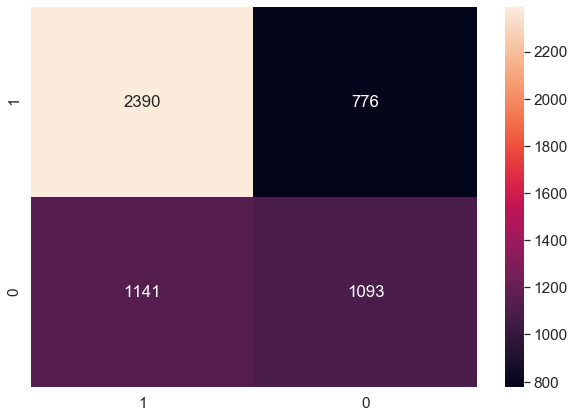

In [44]:
print("Confusion Matrix:")
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

In [45]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
 X = X_train[X_train.columns[rfe.support_]],
 y = y_train, cv = 10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))


Accuracy: 0.654 (+/- 0.018)


In [46]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["feature"]),
 pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
 ],axis = 1)

,feature,coef
0,age,-0.164102
1,deposits,0.305751
2,withdrawal,0.055437
3,purchases_partners,-0.768093
4,purchases,-0.434858
5,cc_taken,0.072335
6,cc_recommended,0.093513
7,web_user,0.134666
8,ios_user,0.072304
9,registered_phones,0.094386


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
 test_size = 0.2,
 random_state = 0)


In [48]:
from sklearn import svm

#Create a svm Classifierz
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 64.18518518518519


In [50]:
print("Precision:",metrics.precision_score(y_test, y_pred)*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred)*100)
print("F1:",metrics.f1_score(y_test,y_pred)*100)

Precision: 59.05797101449275
Recall: 43.77797672336616
F1: 50.28277634961439


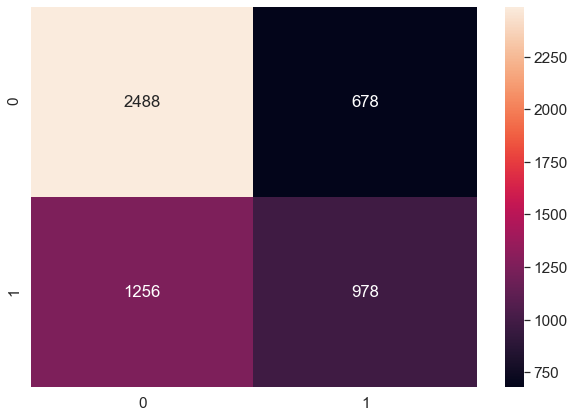

In [51]:
d=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(d, annot=True, fmt='g')

In [52]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
clf= DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [53]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 66.2962962962963


In [54]:
print("Precision:",metrics.precision_score(y_test, y_pred)*100)

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred)*100)
print("F1:",metrics.f1_score(y_test,y_pred)*100)

Precision: 61.0223642172524
Recall: 51.298119964189794
F1: 55.73929961089493


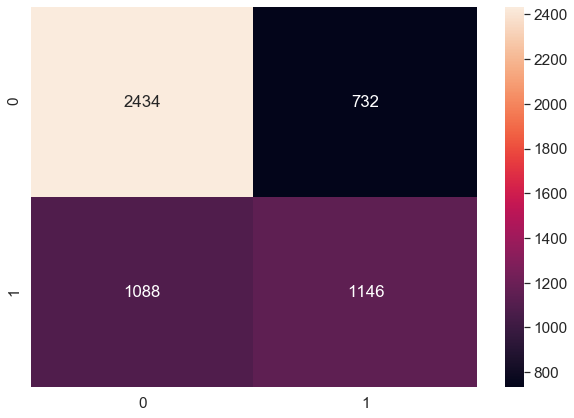

In [55]:
d=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(d, annot=True, fmt='g')

In [57]:
xtest=data_test

In [58]:
from sklearn.model_selection import KFold
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
clf= DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(xtest)

In [59]:
final_results = pd.concat([xtest, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'predicted_churn']].reset_index(drop=True)

In [60]:
final_results.head(20)

,user,predicted_churn
0,61353,1
1,67679,0
2,21269,1
3,69531,0
4,25997,0
5,28827,0
6,58305,0
7,2351,0
8,11790,1
9,46727,0
